# Step 1: Define the objective :
# Finding Iris species with help of SL ,SW,PL,PW

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step 2: Data Gathering: Kaggle website

In [2]:
#Reading CSV files in Pandas
df = pd.read_csv("iris.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Step 3: Data Preparation : Data is already balanced

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


# Dividing Data into X and y

In [4]:
X = df.iloc[: , :4]
y = df['species']

In [5]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=3)

In [8]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (105, 4)
X_test (45, 4)
y_train (105,)
y_test (45,)


# Step 5: Building a ML Model : KNN is used

# KNN for K = 3

In [9]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 3)
KNN_model.fit(X_train,y_train)
print("Model Train Sucessfully for K = 3")

Model Train Sucessfully for K = 3


In [10]:
from sklearn import metrics 
y_pred = KNN_model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Model Acc for K= 3 : ", acc*100)

Model Acc for K= 3 :  95.55555555555556


# Step 6: Model Evaluation
# KNN for K = odd numbers from 5 to 30

In [11]:
accuracy = []
for k in range(1,30,2):
    KNN_model = KNeighborsClassifier(n_neighbors = k)
    KNN_model.fit(X_train,y_train)
    y_pred = KNN_model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(acc)

print("All model Train sucessfully...!!")

All model Train sucessfully...!!


In [12]:
print(accuracy)

[0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333]


Text(0, 0.5, 'Accuracy')

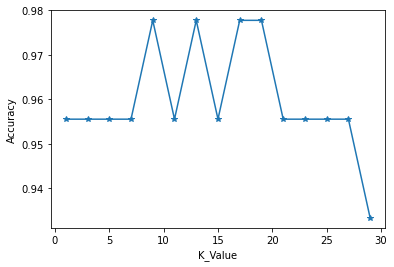

In [13]:
plt.plot(range(1,30,2),accuracy,'*-')
plt.xlabel("K_Value")
plt.ylabel("Accuracy")

In [14]:
KNN_model = KNeighborsClassifier(n_neighbors = 9)
KNN_model.fit(X_train,y_train)
print("Model Trained Sucessfully for K = 9")
y_pred = KNN_model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Model Accuracy for K=9:", acc*100)

Model Trained Sucessfully for K = 9
Model Accuracy for K=9: 97.77777777777777


In [15]:
predictions = y_pred

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, predictions))

0.9777777777777777


In [17]:
print(confusion_matrix(y_test, predictions))

[[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]


In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.93      0.96        14
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Step 7: Predictions : Correct Prediction

In [20]:
test_data = [5.1, 3.2, 1.5, 0.4]
test_data = np.array(test_data)
test_data = test_data.reshape(1,-1)
print(test_data)
pred = KNN_model.predict(test_data)
print(pred[0])

[[5.1 3.2 1.5 0.4]]
setosa


In [23]:
SL = 6.5
SW = 3.0
PL = 5.2
PW = 2.0

In [24]:
KNN_model.predict([[SL,SW,PL,PW]])

array(['virginica'], dtype=object)

In [25]:
pred = KNN_model.predict([[SL,SW,PL,PW]])
print(pred[0])

virginica


# Storing an ML Model

In [75]:
import joblib

joblib.dump(KNN_model,"KNN_model.pkl")
print("Model stored")

Model stored
